- Jorge Ivan Pinzon
- Miguel Angel Nava Perez
- Ana Luisa Parra Valencia

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
from statsmodels.sandbox.stats.runs import runstest_1samp # para la prueba Runs 
from statsmodels.formula.api import ols #modelo lineal del ANOVA
import statsmodels.api as sm 
from tabulate import tabulate
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")

def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")
    
def random_test(residuos):
    """
    Parameters
    ----------
    residuos : Array
        DESCRIPTION: Residuos del ANOVA 

    Returns
    -------
    None.

    """
    _, p_runs = runstest_1samp(residuos, correction=True)

    print(f"Prueba de Runs: p-valor={p_runs}")
    
def test_homogeneityL(var1, var2, name1, name2): # Prueba de levene
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")

    # Prueba de Levene (no asume normalidad)
    levene_stat, levene_p = stats.levene(var1, var2)
    print(f"Levene test: Estadístico = {levene_stat:.4f}, p-valor = {levene_p:.4f}")

def t_test_one(data,mu,variable): #Prueba T para una muestra
    """
    data: arreglo de datos a comparar
    mu: media poblacional o valor de referencia 
    variable: string con el nombre de la variable que se está comparando
    """
    print(f"Prueba T para una sola muestra para {variable}")
    t_stat, p_value = stats.ttest_1samp(data, mu)
    print(f"Estadístico = {t_stat:.4f}, valor_p = {p_value:.4f}")
    
def box_cox(data): #transformación depotencia   

    transformed_data, lambda_opt = stats.boxcox(data)
    return transformed_data, lambda_opt

def tukey(respuesta,factor, alfa,n_factor):
    """

    Parameters
    ----------
    respuesta : Array
        DESCRIPTION. Array con los datos de la variable respuesta
    factor : Array
        DESCRIPTION.Array con los niveles del factor 
    alfa : Float
        DESCRIPTION. Valor alfa de comparación 
    n_factor : String
        DESCRIPTION. Nombre del factor

    Returns
    -------
    None.

    """
    
    tukey = pairwise_tukeyhsd(respuesta, factor, alpha=alfa)
    print(f"Prueba Tukey para el factor {n_factor}")
    print(tukey)
    
def kruskal_W(df,Respuesta,Factor):
    """
    
    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor : String
        DESCRIPTION. nombre del factor, key del dataframe

    Returns
    -------
    None.

    """
    grupos_B = [df[Respuesta][df[Factor] == nivel] for nivel in df[Factor].unique()]
    stat_B, p_B = stats.kruskal(*grupos_B)
    print(f"Kruskal-Wallis para {Factor}: H = {stat_B:.4f}, p = {p_B:.4f}")
    
    
def kruskal_interaccion(df,Respuesta,Factor1,Factor2):
    """
    

    Parameters
    ----------
    df : Data_Frame
        DESCRIPTION. estructura con los datos del experimento
    Respuesta : String
        DESCRIPTION. nombre de la variable respuesta, key del dataframe
    Factor1 : String
        DESCRIPTION. nombre del factor1, key del dataframe
    Factor2 : String
        DESCRIPTION.nombre del factor12, key del dataframe

    Returns
    -------
    None.

    """
    
    df['interaccion'] = df[Factor1].astype(str) + "_" + df[Factor2].astype(str) # se genera una columana con las combinaciones entre factores

    grupos_interaccion = [df[Respuesta][df['interaccion'] == nivel] for nivel in df['interaccion'].unique()]
    stat_int, p_int = stats.kruskal(*grupos_interaccion)
    print(f"Kruskal-Wallis para la interacción {Factor1}x{Factor2} p = {p_int:.4f}")

In [53]:
df = pd.read_excel("res max.xlsx")

## Prueba de normalidad

test_normalitySW(df["Resistencia"] , "Resistencia")



 Análisis de normalidad por Shapiro-Wilk para 'Resistencia'
Estadístico = 0.9595, p-valor = 0.1165


De acuerdo a la prueba realizada, como el p-valor es mayor a alfa =0.05  se concluye que los valores de Resistencia son normales

In [54]:
## Prueba de Homocedasticidad

pva_10 = df[df["PVA"] == 10]
pva_125 = df[df["PVA"]==12.5]
pva_15 = df[df["PVA"]==15]

Ciclos_7 = df[df["CICLOS"] == 7]
Ciclos_11 = df[df["CICLOS"] == 11]
Ciclos_15 = df[df["CICLOS"] == 15]
print("---"*20)
_ , levene_p = stats.levene(pva_10["Resistencia"] , pva_125["Resistencia"] ,pva_15["Resistencia"] )

print(f"Levene test para PVA: p-valor = {levene_p}\n")

_ , levene_p = stats.levene(Ciclos_7["Resistencia"] , Ciclos_11["Resistencia"] , Ciclos_15["Resistencia"] )

print(f"Levene test para Ciclos: p-valor = {levene_p}")

------------------------------------------------------------
Levene test para PVA: p-valor = 0.7434658064763798

Levene test para Ciclos: p-valor = 0.060717790101133685


como el p-valor de la prueba de Levene da mayor a 0.05 en ambos factores, se concluye que son homocedasticos 

y hay indepencia, pues experimentalmente la elección de los ciclos con el valor de concentración de PVA no depende la una de la otra

In [55]:
#%% Realizar el ANOVA 
modelo = ols('Resistencia ~ C(PVA)*C(CICLOS)', data=df).fit()
#modelo = ols('Resistencia ~ C(PVA)+ C(CICLOS) +C(PVA):C(CICLOS)', data=df).fit()
#modelo = ols('Resistencia ~ C(PVA)+C(CICLOS)', data=df).fit()


anova_table = sm.stats.anova_lm(modelo, typ=3)


# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))


┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                  ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept        ┃ 146604   ┃    1 ┃  51.185   ┃   2.06158e-08 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA)           ┃  57215.5 ┃    2 ┃   9.98802 ┃   0.000354328 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(CICLOS)        ┃  14635.8 ┃    2 ┃   2.55495 ┃   0.0917087   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA):C(CICLOS) ┃  40009.1 ┃    4 ┃   3.49216 ┃   0.0164945   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual         ┃ 103111   ┃   36 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛


según los p-valores obtenidos, se puede concluir que los Ciclos y la interacción entre la concentración de PVA y el numero de ciclos son significativas, por otro lado, el p-valor correspondiente a la concentración de PVA es menor al alfa = 0.05, por lo que el resultado dice que este es significativo, pero aún no lo podemos eliminar pues la interaccion entre [PVA] y los Ciclos si es significativa

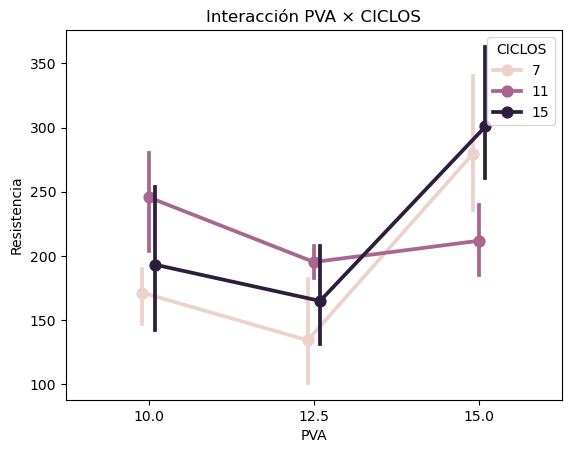

In [56]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.pointplot(x='PVA', y='Resistencia', hue='CICLOS', data=df, dodge=True, markers='o')
plt.title('Interacción PVA × CICLOS')
plt.show()


In [57]:
df['Residuos']=modelo.resid

# normalidad en los residuos 

test_normalitySW(df['Residuos'],'Residuos')


 Análisis de normalidad por Shapiro-Wilk para 'Residuos'
Estadístico = 0.9248, p-valor = 0.0062


al hacer la prueba de Shapiro-Wilk, se obtiene un valor p de 0.0062 < alfa=0.05, por lo que tomamos la H1, que dice que los datos NO pertenecen a una distribución normal. por lo que procederemos a hacer una transformación de potencias a la variable respuesta, realizar nuevamente el ANOVA y posteriormente y aplicarles nuevamente el test de normalidad a los nuevos residuos

In [58]:
resistencia = df['Resistencia'].values

resistencia_boxcox, lambda_trans = stats.boxcox(resistencia)

df['Resistencia_t'] = resistencia_boxcox
df["CICLOS_t"] = (np.power(df["CICLOS"] , lambda_trans) - 1)/lambda_trans
df["PVA_t"] = (np.power(df["PVA"] , lambda_trans) - 1)/lambda_trans


modelo_t = ols('Resistencia_t ~ C(PVA_t)*C(CICLOS_t)', data=df).fit()
anova_t  = sm.stats.anova_lm(modelo_t, typ=3)

print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))



┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                  ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept        ┃ 146604   ┃    1 ┃  51.185   ┃   2.06158e-08 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA)           ┃  57215.5 ┃    2 ┃   9.98802 ┃   0.000354328 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(CICLOS)        ┃  14635.8 ┃    2 ┃   2.55495 ┃   0.0917087   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA):C(CICLOS) ┃  40009.1 ┃    4 ┃   3.49216 ┃   0.0164945   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual         ┃ 103111   ┃   36 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛


tata se imprime para corroborar que el modelo aplicado no se vio afectado

In [59]:
## test de normalidad a los residuos con la transformacion

df["Residuos_t"] = modelo_t.resid
test_normalitySW(df['Residuos_t'],'Residuos transformados')



 Análisis de normalidad por Shapiro-Wilk para 'Residuos transformados'
Estadístico = 0.9495, p-valor = 0.0484


como aun no son normales los datos, probaremos por otro método para normalizarlos

In [66]:

# 2. Calcula el λ que maximiza la verosimilitud

lambda_opt_mle = stats.boxcox_normmax(y , method='mle')

# 3. Transforma con ese λ

df['Resistencia_bc_mle']= stats.boxcox(df['Resistencia'], lmbda=lambda_opt_mle)


df["CICLOS_mle"] = (np.power(df["CICLOS"] , lambda_opt_mle) - 1)/lambda_opt_mle
df["PVA_mle"] = (np.power(df["PVA"] , lambda_opt_mle) - 1)/lambda_opt_mle

# 4. Ajusta de nuevo el modelo sobre Resistencia_bc_mle
modelo_bc_mle = ols('Resistencia_bc_mle ~ C(PVA_mle)*C(CICLOS_mle)', data=df).fit()
anova_bc_mle = sm.stats.anova_lm(modelo_bc_mle, typ=3)
print(tabulate(anova_bc_mle, headers='keys', tablefmt='heavy_grid'))


┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                          ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept                ┃ 349.558  ┃    1 ┃ 873.943   ┃   7.59025e-27 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA_mle)               ┃   9.5391 ┃    2 ┃  11.9245  ┃   0.00010627  ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(CICLOS_mle)            ┃   2.2754 ┃    2 ┃   2.84441 ┃   0.0713005   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA_mle):C(CICLOS_mle) ┃   5.8146 ┃    4 ┃   3.63433 ┃   0.0137804   ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual                 ┃  14.3992 ┃   36 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛
